In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5c5a6c43c3734345766f4e17b4afff24cf9d6efbb5816ca74754828f0630e601
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


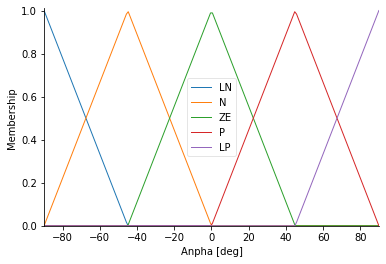

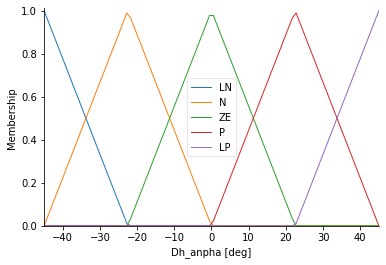

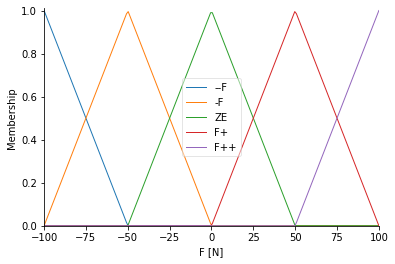

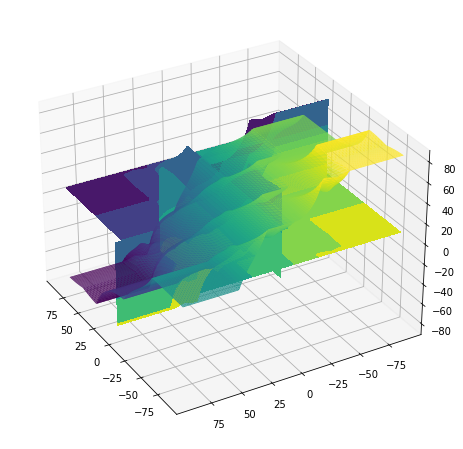

In [9]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_anpha = np.linspace(-90,90,180)
universe_dh_anpha = np.linspace(-45,45,90)
universe_f = np.linspace(-100,100,200)

anpha = ctrl.Antecedent(universe_anpha,'Anpha [deg]')
dh_anpha = ctrl.Antecedent(universe_dh_anpha,'Dh_anpha [deg]')
f = ctrl.Consequent(universe_f,'F [N]')

name_anpha = ['LN','N','ZE','P','LP']
name_f = ['--F','-F','ZE','F+','F++']
anpha.automf(names = name_anpha)
dh_anpha.automf(names = name_anpha)
f.automf(names = name_f)

anpha.view()
dh_anpha.view()
f.view()

rule1 = ctrl.Rule(antecedent=(anpha['LN']&dh_anpha['LN'])|(anpha['N']&dh_anpha['LN'])|(anpha['LN']&dh_anpha['N']),consequent=f['F++'])
rule2 = ctrl.Rule(antecedent=(anpha['ZE']&dh_anpha['LN'])|(anpha['N']&dh_anpha['N'])|(anpha['LN']&dh_anpha['ZE'])|(anpha['P']&dh_anpha['LN'])|(anpha['ZE']&dh_anpha['N'])|(anpha['N']&dh_anpha['ZE'])|(anpha['LN']&dh_anpha['P']),consequent=f['F+'])
rule3 = ctrl.Rule(antecedent=(anpha['LP']&dh_anpha['LN'])|(anpha['P']&dh_anpha['N'])|(anpha['ZE']&dh_anpha['ZE'])|(anpha['N']&dh_anpha['P'])|(anpha['LN']&dh_anpha['LP'])|(anpha['LP']&dh_anpha['N'])|(anpha['P']&dh_anpha['ZE'])|(anpha['P']&dh_anpha['ZE'])|(anpha['ZE']&dh_anpha['P'])|(anpha['N']&dh_anpha['LP']),consequent=f['ZE'])
rule4 = ctrl.Rule(antecedent=(anpha['LP']&dh_anpha['ZE'])|(anpha['P']&dh_anpha['P'])|(anpha['ZE']&dh_anpha['LP']),consequent=f['-F'])
rule5 = ctrl.Rule(antecedent=(anpha['LP']&dh_anpha['P'])|(anpha['P']&dh_anpha['LP'])|(anpha['LP']&dh_anpha['LP']),consequent=f['--F'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=61*61+1)
upsampled = np.linspace(-90,90,180)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(180):
  for j in range(180):
    sim.input['Anpha [deg]'] = x[i,j]
    sim.input['Dh_anpha [deg]'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['F [N]']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,150)